Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection & processing

In [2]:
calories= pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
exercise= pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
# Combining the 2 data frames
dataset= pd.concat([exercise, calories['Calories']], axis=1)
# axis=1 because concatenation column wise(0 for row wise)
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
# Checking no. of rows & columns
dataset.shape

(15000, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
# Checking for missing values
dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [8]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualisation

In [9]:
sns.set()
# it will give some theme for our plots

<Axes: xlabel='Gender', ylabel='count'>

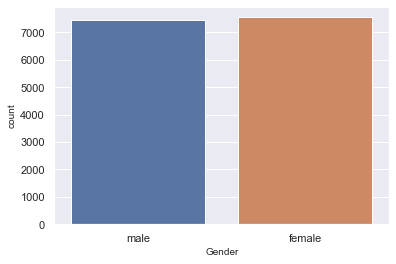

In [10]:
# Plotting the gender column in count plot
sns.countplot(data=dataset, x='Gender')
# plt.show()

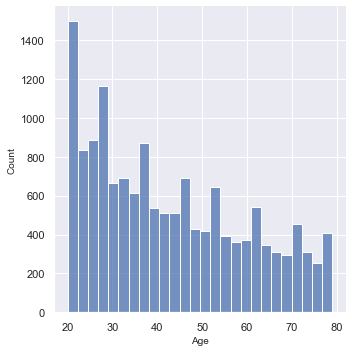

In [11]:
# finding the distribution of age column(range)
sns.displot(data=dataset, x='Age')

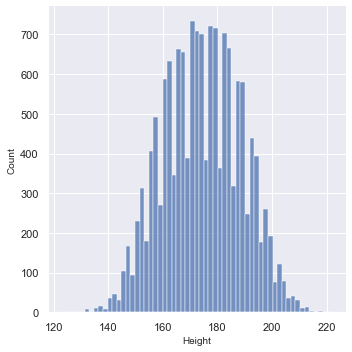

In [12]:
# finding the distribution of height column(range)
sns.displot(data=dataset, x='Height')

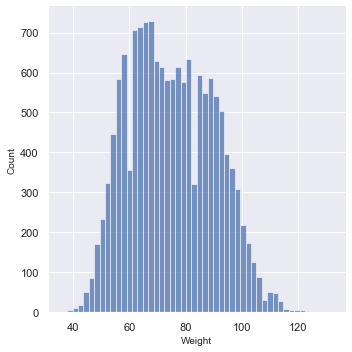

In [13]:
# finding the distribution of weight column(range)
sns.displot(data=dataset, x='Weight')

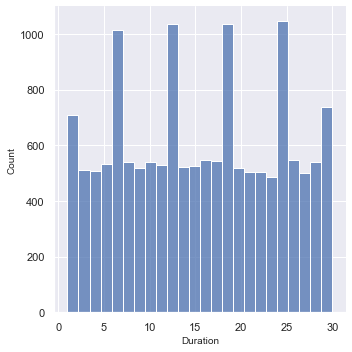

In [14]:
# finding the distribution of duration column(range)
sns.displot(data=dataset, x='Duration')

Finding correlation in the data

In [15]:
correlation= dataset.corr()

<Axes: >

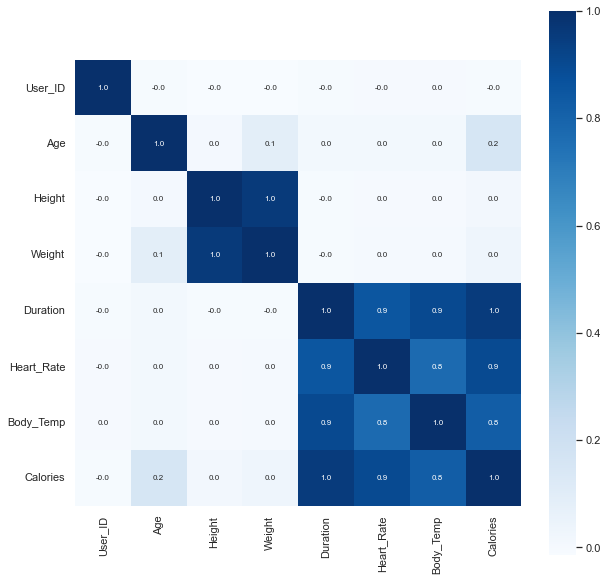

In [16]:
# constructing heat map to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
# Converting text data into numerical data
dataset.replace({"Gender":{'male':0, 'female':1}},inplace=True)

In [18]:
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
x=dataset.drop(columns=['User_ID','Calories'],axis=1)
y=dataset['Calories']

In [20]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [21]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting dataset into training and test set

In [22]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

In [24]:
# loading the model
model= XGBRegressor()

In [25]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [26]:
predictor=model.predict(x_test)
print(predictor)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


Mean Absolute Error

In [27]:
error= metrics.mean_absolute_error(y_test, predictor)
print(error)

1.4807048829992613


To Build a Predictive System

In [32]:
a=[]
a.append(int(input("For gender, enter '0' for male & '1' for female: ")))
a.append(float(input("Enter Age:")))
a.append(float(input("Enter Height: ")))
a.append(float(input("Enter Weight: ")))
a.append(float(input("Enter Duration: ")))
a.append(float(input("Enter Heart rate: ")))
a.append(float(input("Enter Body temperture: ")))

print(a)

# changing input_data to a numpy array
input_numpy = np.asarray(a)

# reshape the array
input_reshaped = input_numpy.reshape(1,-1)

prediction =  model.predict(input_reshaped)

print('Calorie burnt is ', prediction[0])

[1, 36.0, 151.0, 50.0, 23.0, 96.0, 40.7]
Calorie burnt is  125.71242
